# Deep Learning in Python(4) - Fine-tuning keras models

## Understanding model optimization

### Changing optimization parameters

It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.

In [1]:
import pandas as pd

df = pd.read_csv('titanic_all_numeric.csv')
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [2]:
predictors = df.drop('survived', axis=1).as_matrix()
n_cols = predictors.shape[1]
input_shape = (n_cols, )

from keras.utils import to_categorical
target = to_categorical(df.survived)

Using TensorFlow backend.


In [3]:
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [4]:
# Import the SGD optimizer
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)
    



Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 0s - loss: 3.9147     
Epoch 2/10
891/891 [==============================] - 0s - loss: 3.8727     
Epoch 3/10
891/891 [==============================] - 0s - loss: 3.8308     
Epoch 4/10
891/891 [==============================] - 0s - loss: 3.7890     
Epoch 5/10
891/891 [==============================] - 0s - loss: 3.7475     
Epoch 6/10
891/891 [==============================] - 0s - loss: 3.7061     
Epoch 7/10
891/891 [==============================] - 0s - loss: 3.6649     
Epoch 8/10
891/891 [==============================] - 0s - loss: 3.6239     
Epoch 9/10
891/891 [==============================] - 0s - loss: 3.5830     
Epoch 10/10
891/891 [==============================] - 0s - loss: 3.5425     


Testing model with learning rate: 0.010000

Epoch 1/10
891/891 [==============================] - 0s - loss: 1.5097     
Epoch 2/10
891/891 [==============================] - 0s - l

## Model validation

### Evaluating model accuracy on validation dataset

Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

In [5]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)


Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s - loss: 0.8564 - acc: 0.6003 - val_loss: 0.5331 - val_acc: 0.7164
Epoch 2/10
623/623 [==============================] - 0s - loss: 0.6486 - acc: 0.6565 - val_loss: 0.6239 - val_acc: 0.6791
Epoch 3/10
623/623 [==============================] - 0s - loss: 0.6093 - acc: 0.6838 - val_loss: 0.5264 - val_acc: 0.7687
Epoch 4/10
623/623 [==============================] - 0s - loss: 0.6500 - acc: 0.6709 - val_loss: 0.5276 - val_acc: 0.7313
Epoch 5/10
623/623 [==============================] - 0s - loss: 0.6370 - acc: 0.6838 - val_loss: 0.5003 - val_acc: 0.7463
Epoch 6/10
623/623 [==============================] - 0s - loss: 0.6026 - acc: 0.6918 - val_loss: 0.4932 - val_acc: 0.7612
Epoch 7/10
623/623 [==============================] - 0s - loss: 0.6503 - acc: 0.6693 - val_loss: 0.5109 - val_acc: 0.7724
Epoch 8/10
623/623 [==============================] - 0s - loss: 0.5714 - acc: 0.7030 - val_l

### Early stopping: Optimizing the optimization

Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit(), as Dan showed in the video.

The model you'll optimize has been specified as model. As before, the data is pre-loaded as predictors and target.

In [6]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])


Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s - loss: 1.1151 - acc: 0.5923 - val_loss: 0.5920 - val_acc: 0.7388
Epoch 2/30
623/623 [==============================] - 0s - loss: 0.7319 - acc: 0.6388 - val_loss: 0.6973 - val_acc: 0.6418
Epoch 3/30
623/623 [==============================] - 0s - loss: 0.6408 - acc: 0.6806 - val_loss: 0.6384 - val_acc: 0.6866
Epoch 4/30
623/623 [==============================] - 0s - loss: 0.6498 - acc: 0.6709 - val_loss: 0.5891 - val_acc: 0.6940
Epoch 5/30
623/623 [==============================] - 0s - loss: 0.6261 - acc: 0.6806 - val_loss: 0.5220 - val_acc: 0.7537
Epoch 6/30
623/623 [==============================] - 0s - loss: 0.6111 - acc: 0.6950 - val_loss: 0.5314 - val_acc: 0.7239
Epoch 7/30
623/623 [==============================] - 0s - loss: 0.6535 - acc: 0.6870 - val_loss: 0.7313 - val_acc: 0.6455
Epoch 8/30
623/623 [==============================] - 0s - loss: 0.6613 - acc: 0.6902 - val_l

### Experimenting with wider networks

Now you know everything you need to begin experimenting with different models!

A model called model_1 has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

In this exercise you'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

After you create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.



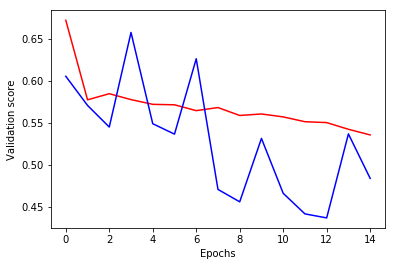

In [7]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)


# Create model_1
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)


# Create the plot
import matplotlib.pyplot as plt
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


In [8]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 22        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 202       
Total params: 11,402
Trainable params: 11,402
Non-trainable params: 0
_________________________________________________________________


### Adding layers to a network

You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

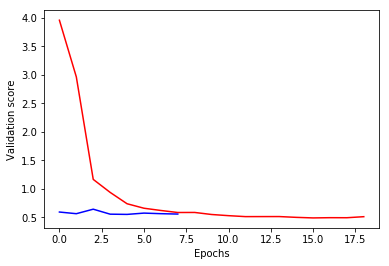

In [10]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)


# Create model_1
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


In [11]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 102       
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_25 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 102       
Total params: 5,752
Trainable params: 5,752
Non-trainable params: 0
_________________________________________________________________


## Stepping up to images

### Building your own digit recognition model

You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a [blog post](https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws) by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

In [13]:
import numpy as np

mnist = np.genfromtxt('mnist.csv', delimiter=',')
X = mnist[:, 1:]
y = mnist[:, 0]
y = to_categorical(y)

In [14]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784, )))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3)


Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 0s - loss: 13.0592 - acc: 0.1757 - val_loss: 10.1677 - val_acc: 0.3245
Epoch 2/10
1400/1400 [==============================] - 0s - loss: 8.4489 - acc: 0.4393 - val_loss: 8.2165 - val_acc: 0.4659
Epoch 3/10
1400/1400 [==============================] - 0s - loss: 6.9395 - acc: 0.5443 - val_loss: 7.2076 - val_acc: 0.5374
Epoch 4/10
1400/1400 [==============================] - 0s - loss: 6.0690 - acc: 0.6021 - val_loss: 6.4512 - val_acc: 0.5790
Epoch 5/10
1400/1400 [==============================] - 0s - loss: 5.3999 - acc: 0.6464 - val_loss: 6.1851 - val_acc: 0.5973
Epoch 6/10
1400/1400 [==============================] - 0s - loss: 5.4924 - acc: 0.6414 - val_loss: 6.0830 - val_acc: 0.6090
Epoch 7/10
1400/1400 [==============================] - 0s - loss: 5.1234 - acc: 0.6700 - val_loss: 5.7800 - val_acc: 0.6206
Epoch 8/10
1400/1400 [==============================] - 0s - loss: 4.8461 - 